[[[181. 181. 181.]
  [178. 178. 178.]
  [174. 174. 174.]
  ...
  [237. 237. 237.]
  [241. 241. 241.]
  [251. 251. 251.]]

 [[179. 179. 179.]
  [178. 178. 178.]
  [176. 176. 176.]
  ...
  [236. 236. 236.]
  [241. 241. 241.]
  [252. 252. 252.]]

 [[178. 178. 178.]
  [179. 179. 179.]
  [182. 182. 182.]
  ...
  [234. 234. 234.]
  [241. 241. 241.]
  [254. 254. 254.]]

 ...

 [[ 98.  98.  98.]
  [113. 113. 113.]
  [128. 128. 128.]
  ...
  [102. 102. 102.]
  [114. 114. 114.]
  [171. 171. 171.]]

 [[ 55.  55.  55.]
  [ 77.  77.  77.]
  [108. 108. 108.]
  ...
  [112. 112. 112.]
  [125. 125. 125.]
  [179. 179. 179.]]

 [[ 69.  69.  69.]
  [ 91.  91.  91.]
  [124. 124. 124.]
  ...
  [150. 150. 150.]
  [161. 161. 161.]
  [207. 207. 207.]]]


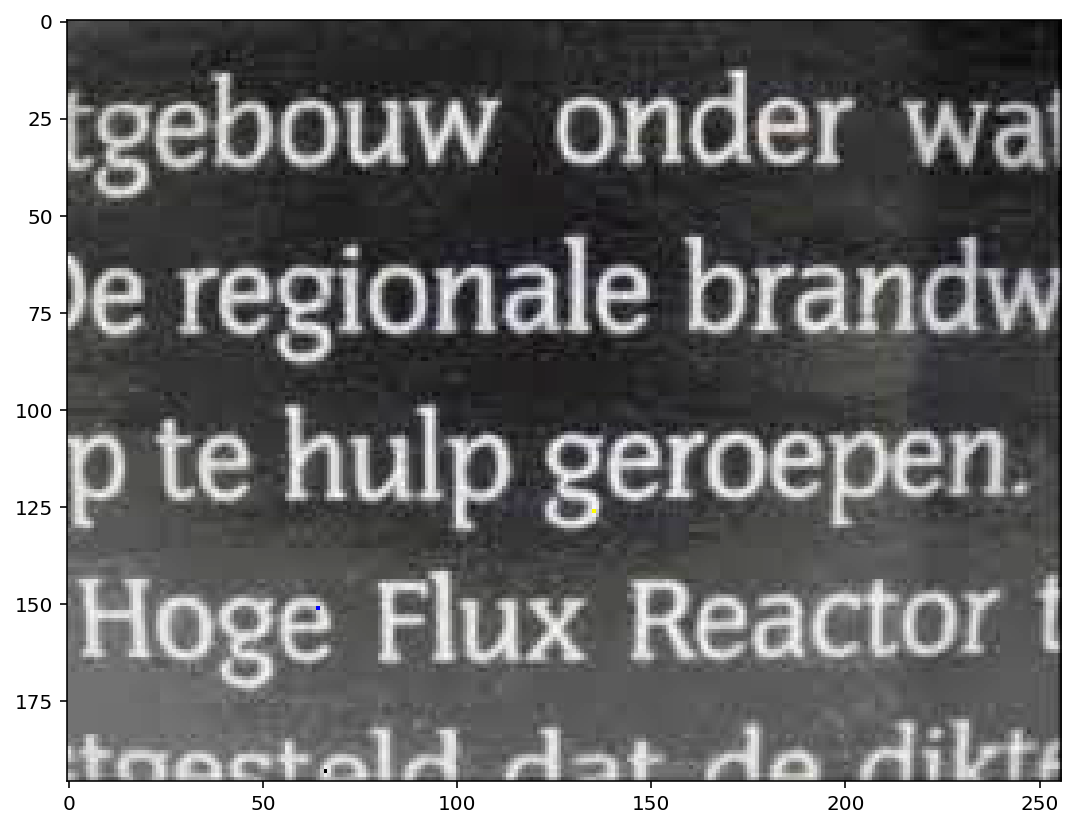

In [112]:
import matplotlib.image as imr
import matplotlib.pyplot as plt
import cv2
import numpy as np
im = imr.imread('test_image1.png')
im.setflags(write=1)
im = np.round(cv2.normalize(im, None, alpha = 0, beta = 255., norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F))
#im = np.round((im + 1) * 256 / 2) * 127.5
im.astype(np.uint8)
print im
plt.rcParams["figure.figsize"] = (10,7)
plt.imshow(im)
plt.show()

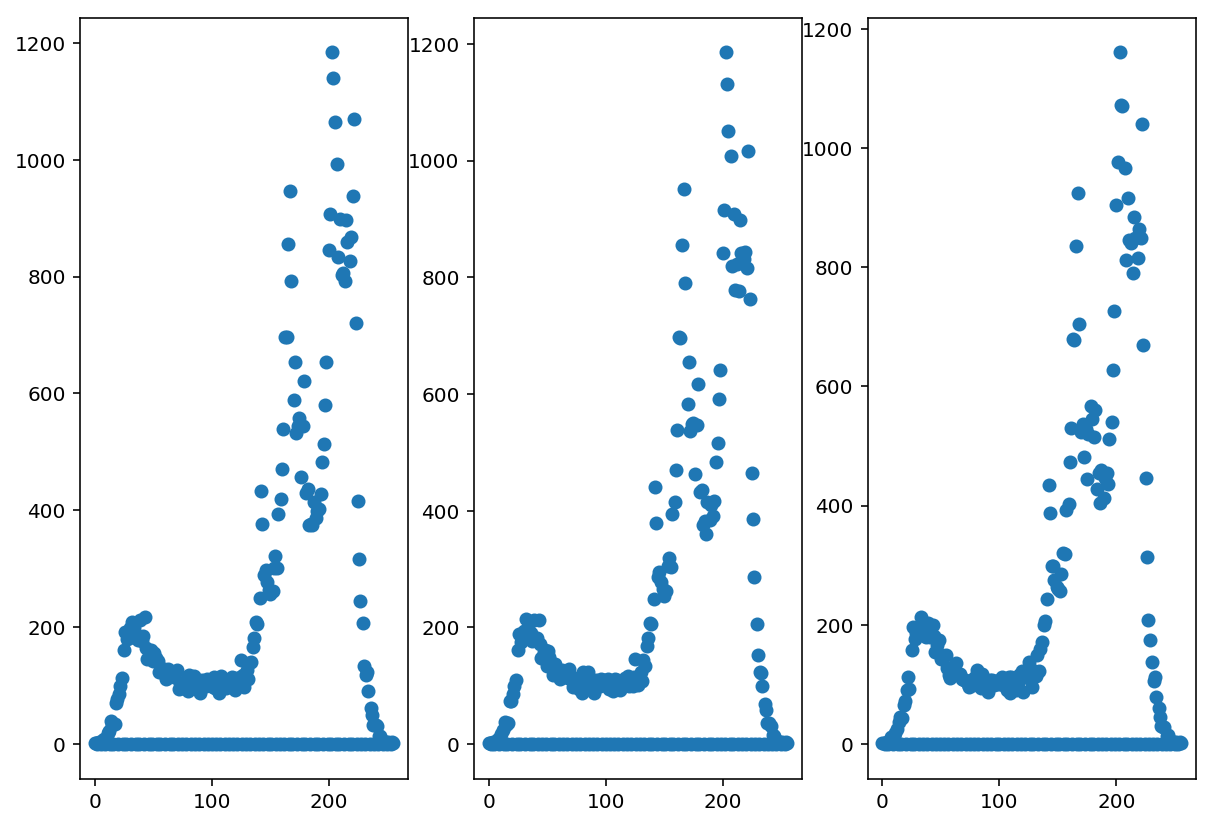

In [113]:
# histogram

import numpy as np

def histogram(im, bins):
    res = np.zeros(bins)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            inx = int(im[i, j])
            res[inx] = res[inx] + 1
    return res
h1 = histogram(im[:,:,0], 256)
h2 = histogram(im[:,:,1], 256)
h3 = histogram(im[:,:,2], 256)
plt.subplot(131)
plt.scatter(np.arange(256), h1)
plt.subplot(132)
plt.scatter(np.arange(256), h2)
plt.subplot(133)
_=plt.scatter(np.arange(256), h3)

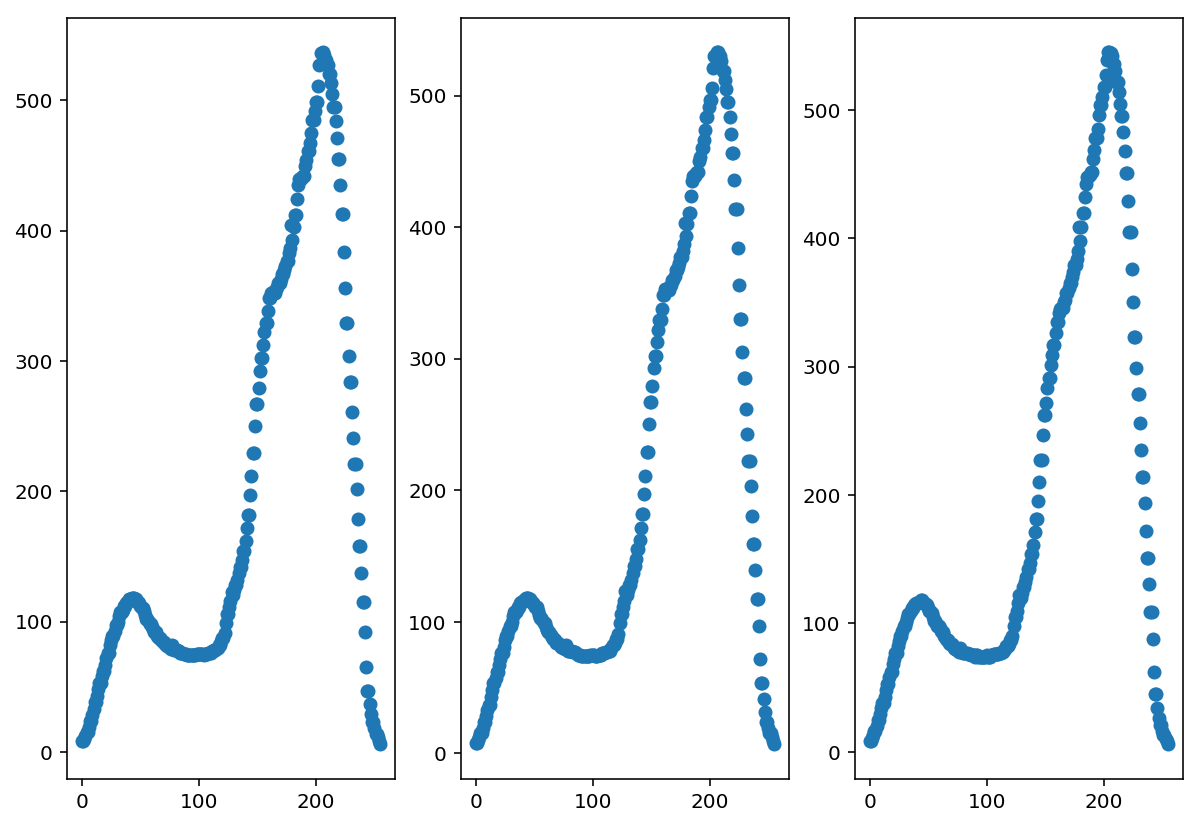

In [114]:
def smooth (g, n):
    res=np.zeros_like(g)
    for i in range(g.shape[0]):
        s=0
        for j in range(-n//2, n//2):
            inx = i+j
            if inx >= 0 and inx<g.shape[0]:
                s=s+g[inx]
        res[i]=s//n
    return res

n=40
_h1 = smooth(h1,n)
_h2 = smooth(h2,n)
_h3 = smooth(h3,n)
plt.subplot(131)
plt.scatter(np.arange(256),_h1)

plt.subplot(132)
plt.scatter(np.arange(256),_h2)
plt.subplot(133)
_ = plt.scatter(np.arange(256),_h3)

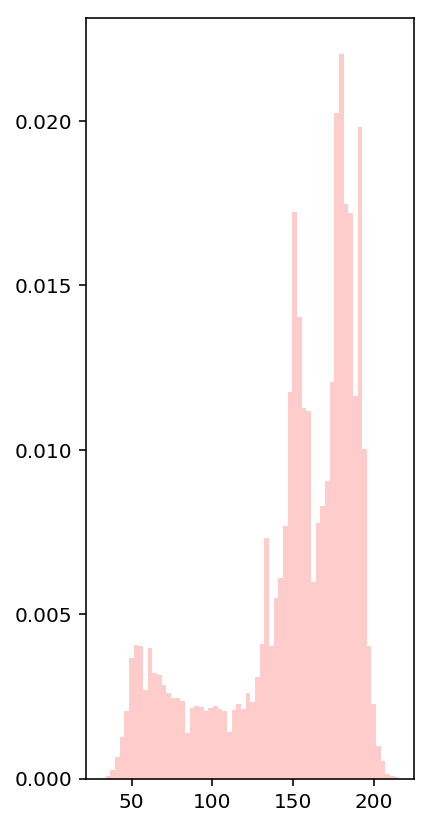

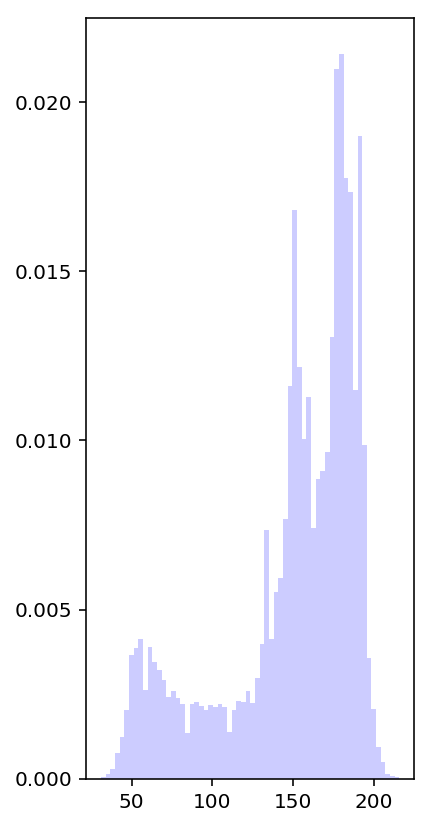

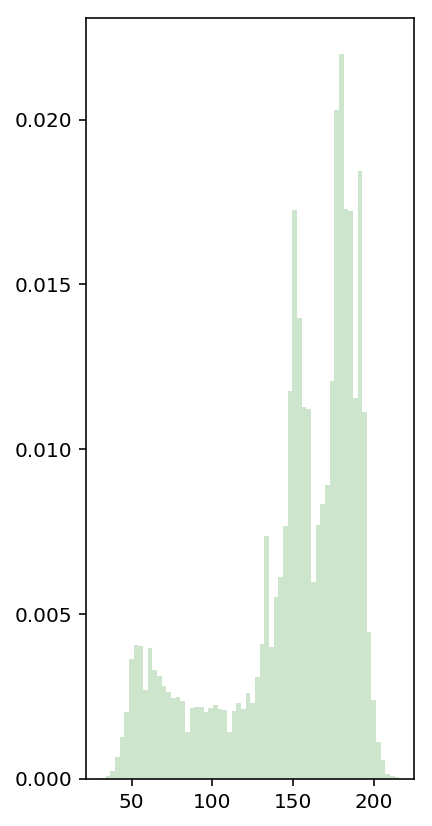

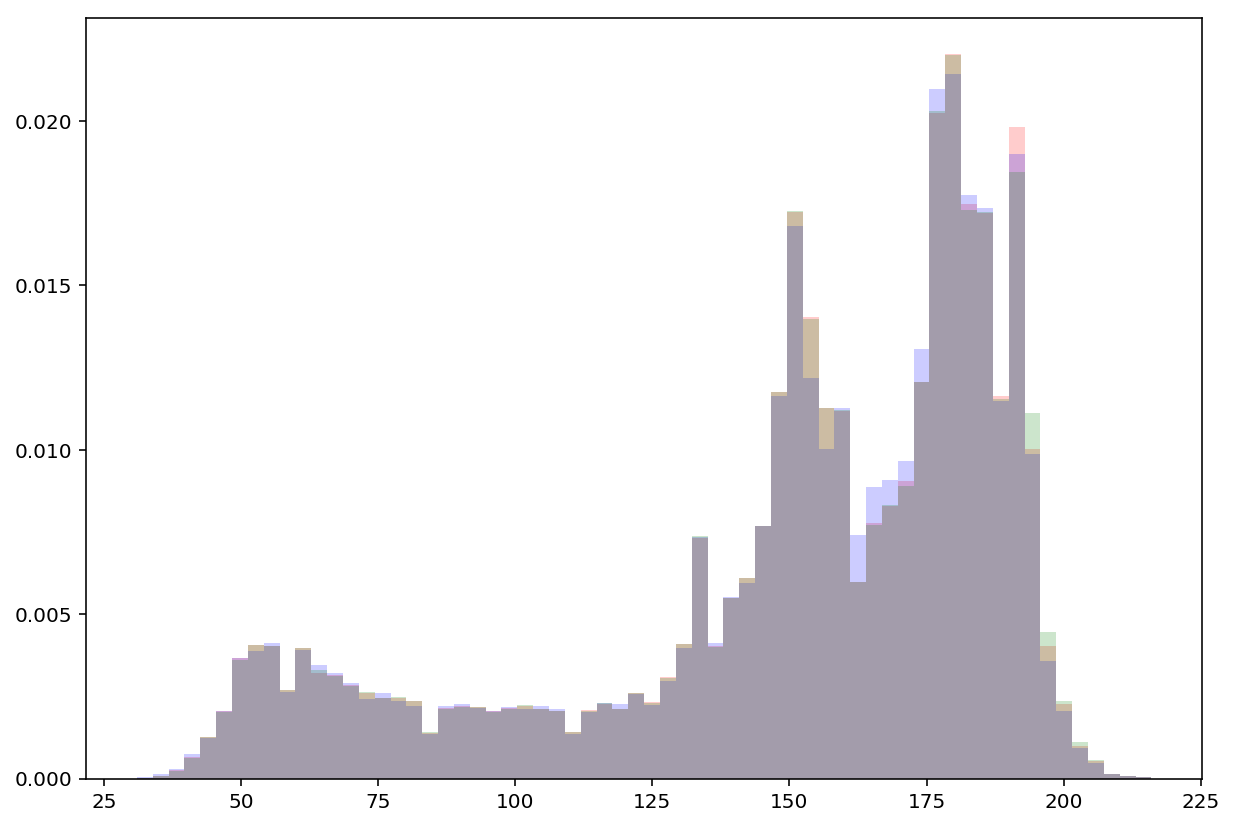

In [115]:

# Извлечение гистограмм из цветного изображения
# Отдельные каналы RGB (красный-зеленый-синий) выделены в виде двумерных массивов красного, зеленого и синего цветов соответственно.
# Построение треx наложенных цветных гистограмм на общих осях (по одному для каждого канала) в подзаголовке.
image = imr.imread('test_image1.png')
image = image * 255
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract RGB
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Сглажевание 2D Массивов каналов в одномерные
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()


plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.subplot(131)
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.show()
plt.subplot(132)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.show()
plt.subplot(133)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)
plt.show()

# Наложение гистограмм пикселей каждого цвета
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()

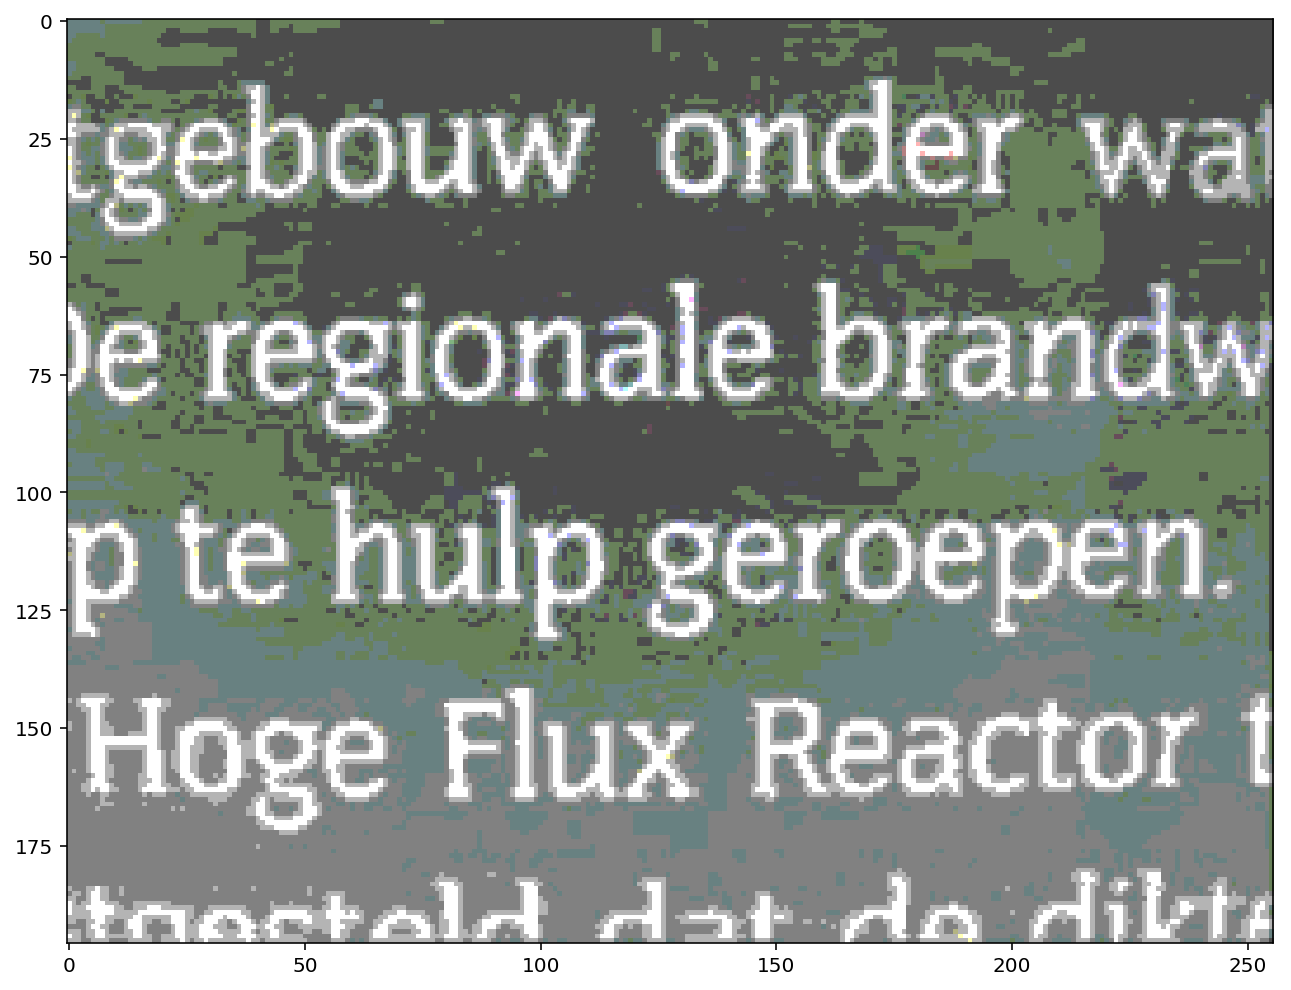

In [116]:
from skimage.io import imread, imshow, show

im1 = imread('test_image1.png')
im1 = im1 * 255
def locmin(g):
    res=[]
    for i in range(1, g.shape[0]-1):
        if g[i-1]>g[i] and g[i]<g[i+1]:
             res.append(i)
    res.append(255)
    return res

l1 = locmin(_h1)
l2 = locmin(_h2)
l3 = locmin(_h3)

def colored(h, lm):
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            for lc in lm:
                if h[i,j]<lc:
                    h[i,j]=lc
                    break
    return h
im1.setflags(write=1)
im1[:,:,0]=colored(im1[:,:,0],l1)
im1[:,:,1]=colored(im1[:,:,1],l2)
im1[:,:,2]=colored(im1[:,:,2],l3)
imshow(im1)
show()

Всего сегментов: 147


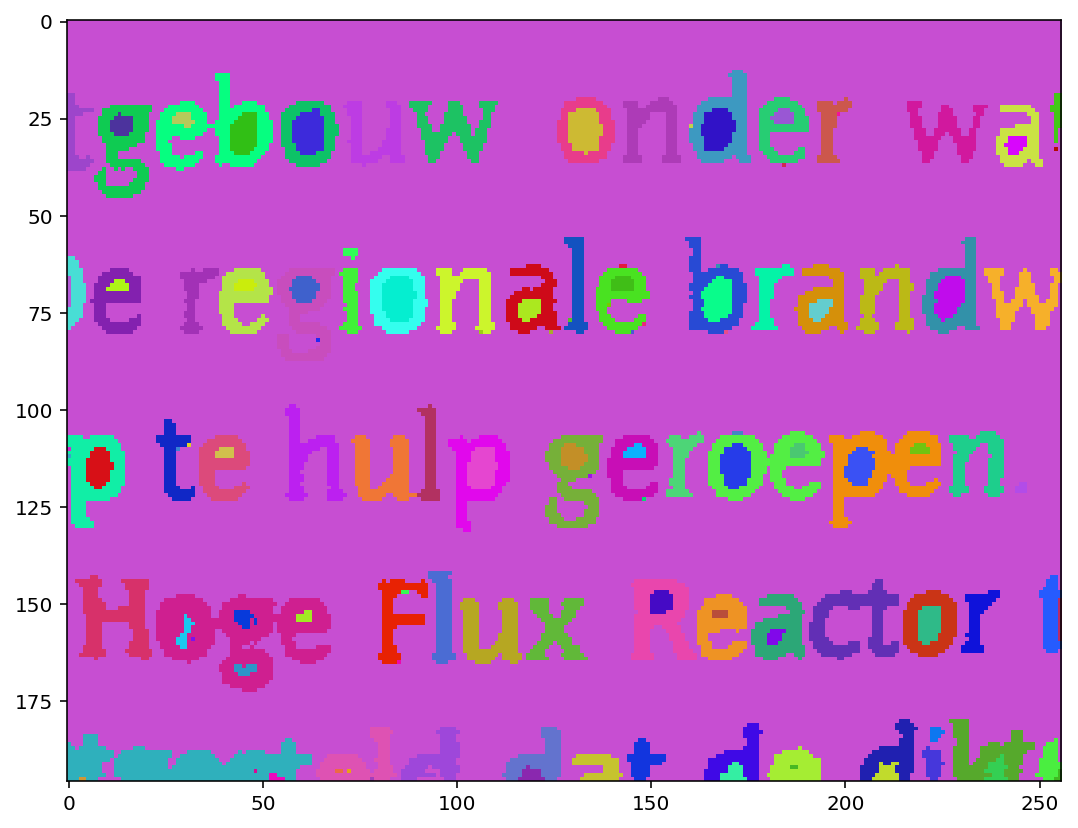

In [117]:
def random_color():
    h,s,l = random.random(), 0.5 + random.random()/2.0, 0.4 + random.random()/5.0
    r,g,b = [int(256*i) for i in colorsys.hls_to_rgb(h,l,s)]
    return [r, g, b]

# Метрика (пункт 8)
def metric(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

# Рекурсивная функция добавления пикселя в сегмент:
# Pc - приемлемый диапазон, x - координаты добавляемого пикселя,
# seg - матрица сегментов, im - изображение,
# P - сумма яркостей пикселей в сегменте,
# n - количество пикселей в сегменте, n - номер сегмента.
def append(Pc, x, seg, im, P, n, i):
    # Добавляемый пиксель помечается принадлежащим текущему сегменту,
    seg[x[0],x[1]]=i
    n=n+1 # увеличивается количество пикселей в сегменте,
    P=P+im[x[0],x[1],:] #яркость добавленного пикселя добавляется к сумме яркостей.
    for w in range(-1,2): # Циклы, проходящие
        for h in range(-1,2): # восемь соседей добавленного пикселя
            if w==0 and h==0: continue # Если сам пиксел не является своим соседом, то находим
            cx=x[0]+w; cy=x[1]+h # координаты n-го соседа
            # и если они выходят за пределы изображения,
            # то переходим к следующему соседу.
            if cx<0 or cy<0 or cx>=im.shape[0] or cy>= im.shape[1]: continue
            #Если n-й сосед уже входит в какой-либо сегмент,
            if seg[cx, cy] !=0: continue # то он пропускается.
            #Находим расстояние между базовой яркостью сегмента
            Pi=metric(P/n, im[cx, cy, :]) # и яркостью n-го соседа
            if Pi<=Pc: # и если оно меньше или равно приемлемому,
                try:
                    # то добавляем n-ный сосед в текущий сегмент
                    seg, P, n = append(Pc, [cx, cy], seg, im, P, n, i)
                except Exception:
                    print("Достигнут лимит вызова рекурсий!")
    # возвращается матрица сегментов, сумма яркостей пикселей в сегменте
    return(seg, P, n) # и количество пикселей в сегменте.

# Функция динамической сегментации
# im - изображение, Pc - приемлемый диапазон (пункт 1)
def din_seg(im, Pc):
    # Создается матрица сегментов
    seg = np.zeros([im.shape[0], im.shape[1]])
    si=1 # и счетчик сегментов.
    while True:
        #Ищется первый пиксель, не принадлежащий
        x=np.where(seg==0) # какому-либо сегменту.
        # Если такого нет
        if len(x[0])==0 or len(x[1]) == 0: break # то выходим из цикла.
        # Если есть, то добавляем его в текущий сегмент.
        seg, _, _ = append(Pc,[x[0][0],x[1][0]], seg, im,[0.,0.,0.], 0, si)
        cl = random_color() # Случайный цвет
        for i in range (im.shape[0]): # которым мы раскрашиваем
            for j in range (im.shape[1]): # каждый пиксель изображения
                # который принадлежит
                if seg[i,j]==si: im[i,j]=cl # текущему сегменту.
        si=si+1 
    # Возвращаем количество сегментов
    return si

import resource, sys
import random
import colorsys
im = imr.imread('test_image1.png')
im = im * 255
im.setflags(write=1)
# Запрашивается большой стек
resource.setrlimit(resource.RLIMIT_STACK, (2**29,-1))
# и большой лимит вызова рекурсий.
sys.setrecursionlimit(10**6)
# Динамическая сегментация 
P = 90. # с приемлемым диапазоном равным 90.
seg_count = din_seg(im, P)
print ("Всего сегментов: "+str(seg_count))
plt.imshow(im)
plt.show()

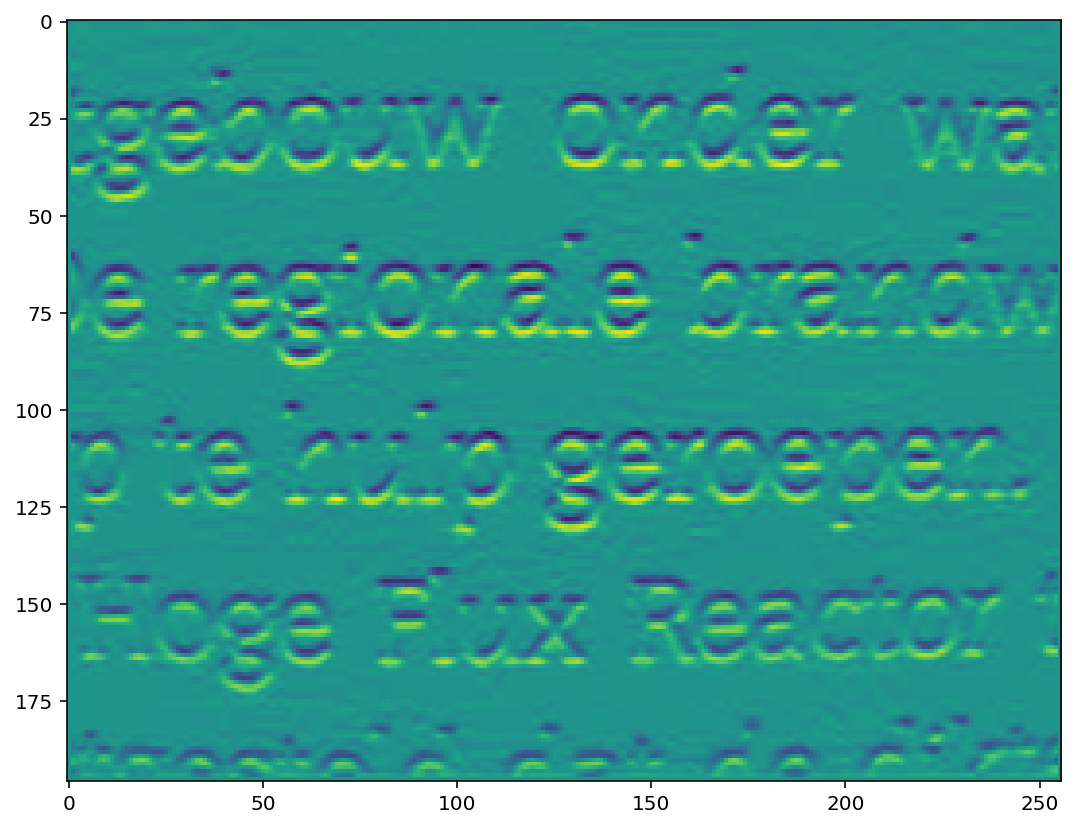

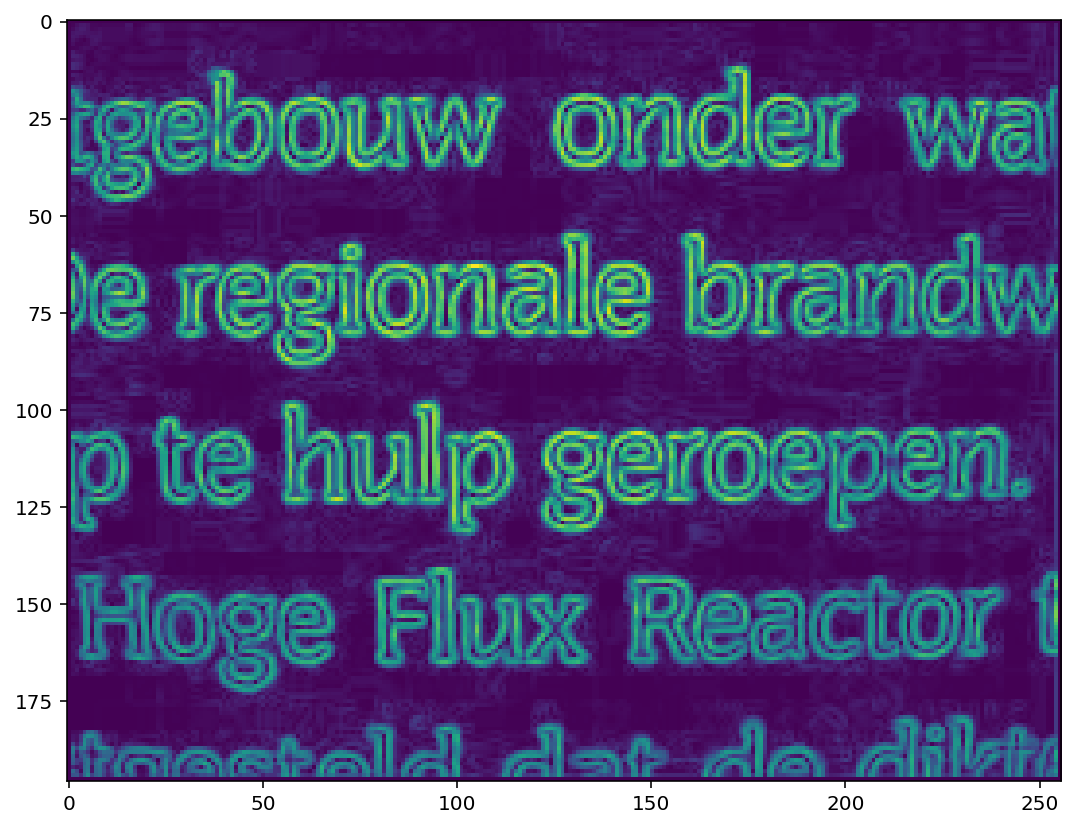

In [118]:
from scipy import ndimage as ndi
from skimage import filters

image = imr.imread('test_image1.png')
image = image
image = image[:, :, 0]
hsobel_text = filters.sobel_h(image)

plt.imshow(hsobel_text)
plt.show()

from skimage.filters import sobel
elevation_map = sobel(image)

markers = np.zeros_like(image)
markers[image < 30] = 1
markers[image > 150] = 2

from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_img, _ = ndi.label(elevation_map)
plt.imshow(elevation_map)
plt.show()
#plt.imshow(labeled_coins)
#plt.show()

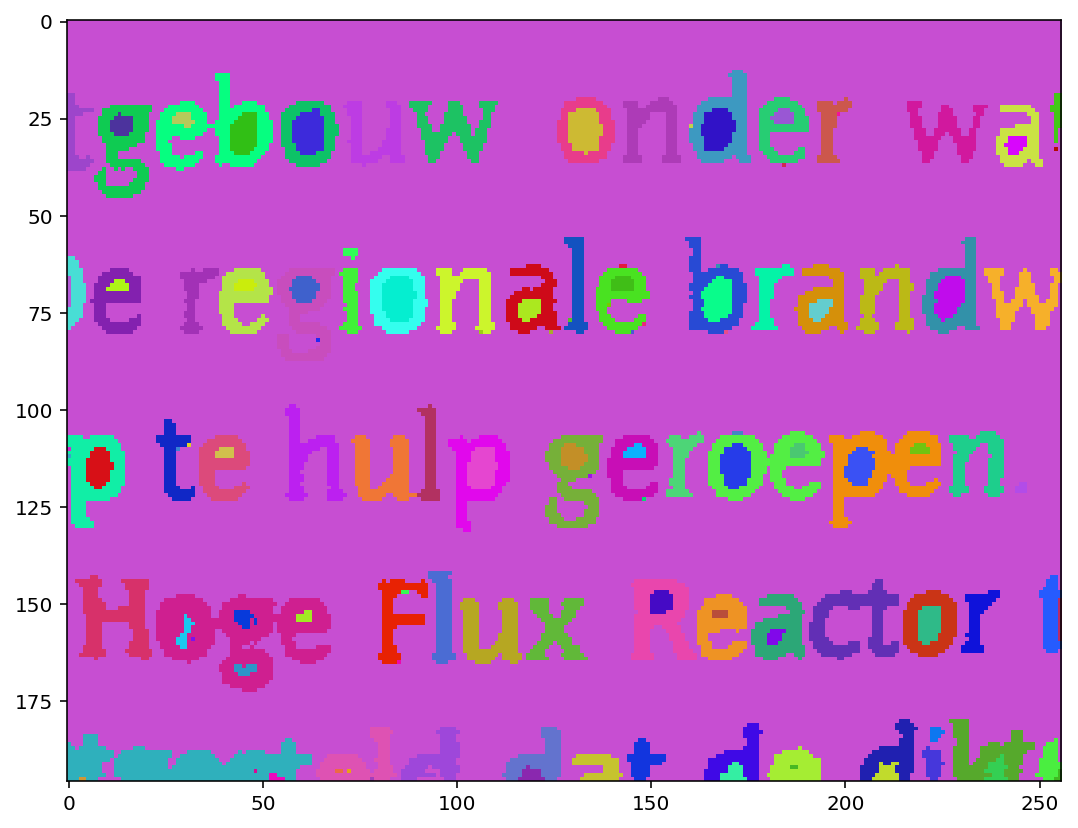

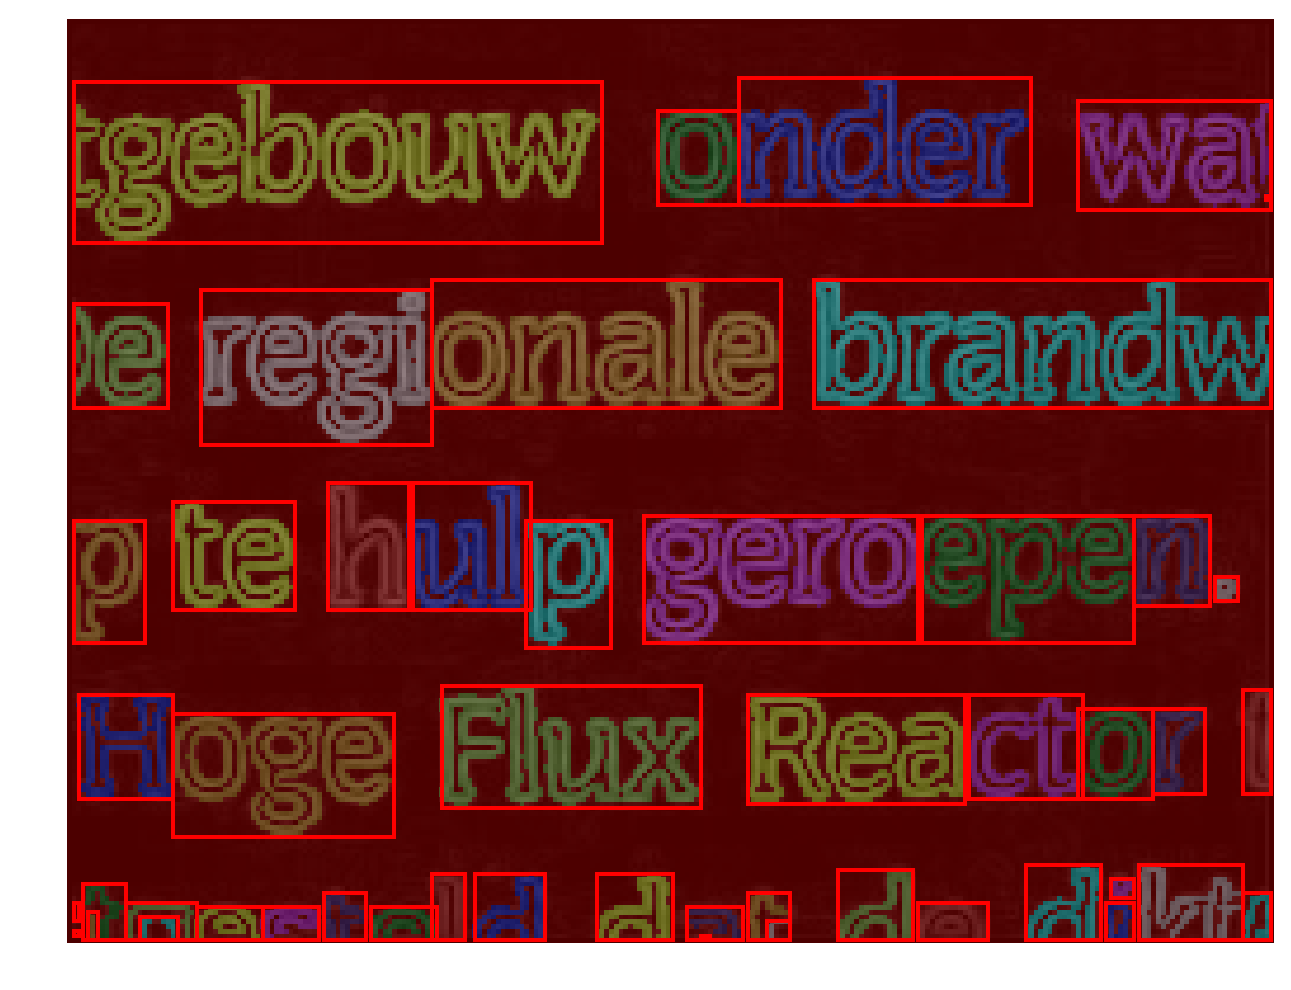

In [119]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_yen
from skimage.filters import threshold_isodata
from skimage.filters import threshold_li
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

#image = im[:, :, 0] / 255
#image = imr.imread('test_image1.png')
#image = image
#image = image[:, :, 1]
image = elevation_map
#image = np.clip((hsobel_text * 1) / 255, 0, 1)
thresh = threshold_isodata(image)
bw = closing(image >= thresh, square(1))
plt.imshow(im)
plt.show()
# remove artifacts connected to image border
#cleared = clear_border(bw)
cleared = bw
# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(image_label_overlay)


for region in regionprops(label_image):
    # take regions with large enough areas
    #if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()